In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib as plt
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

In [2]:
import datetime

In [4]:
date_parser = lambda ts: datetime.strptime(ts, "%y-%m-%dT%H:%M:%SZ")
df = pd.read_csv('./pricing/aviasales_data_t.csv')
df['requested_at'] = pd.to_datetime(df['requested_at'], format="%y-%m-%dT%H:%M:%SZ", errors="coerce")
df['departure_at'] = pd.to_datetime(df['departure_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['expires_at'] = pd.to_datetime(df['expires_at'], format="%Y-%m-%dT%H:%M:%SZ", errors="coerce")
df['price'] = pd.to_numeric(df["price"], errors="coerce")
df = df.dropna()
df

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
0,MOW,LED,2021-03-06 18:45:00,DP,205,3568.0,2021-03-06 13:24:28,2021-03-06 10:28:54
1,MOW,LED,2021-03-07 04:20:00,U6,9631,2438.0,2021-03-07 04:20:00,2021-03-06 10:28:54
2,MOW,LED,2021-03-08 03:45:00,DP,201,2411.0,2021-03-08 03:45:00,2021-03-06 10:28:54
3,MOW,LED,2021-03-09 05:10:00,DP,207,2618.0,2021-03-09 05:10:00,2021-03-06 10:28:54
4,MOW,LED,2021-03-10 04:30:00,DP,209,2468.0,2021-03-09 06:15:06,2021-03-06 10:28:54
...,...,...,...,...,...,...,...,...
267344,SVX,YKS,2021-04-20 10:30:00,S7,5018,27406.0,2021-04-10 10:03:27,2021-04-09 12:30:06
267345,SVX,YKS,2021-04-21 10:30:00,S7,5018,27406.0,2021-04-11 10:51:35,2021-04-09 12:30:06
267346,SVX,YKS,2021-04-25 16:05:00,S7,5020,27406.0,2021-04-11 20:19:00,2021-04-09 12:30:06
267347,SVX,YKS,2021-04-28 10:30:00,S7,5018,27406.0,2021-04-11 06:30:25,2021-04-09 12:30:06


In [5]:
# Duplicates? What we consider to be one of them?
# -- Entries with the same 'departure_at', 'expires_at', 'flight_number', 'price' -- Middle priority, easy to fix
df = df.drop_duplicates(subset=['departure_at', 'expires_at', 'airline', 'flight_number', 'price'], keep='first')

departure_at
2021-03-07     8787.0
2021-03-08     7414.0
2021-03-09     9386.0
2021-03-10     8788.0
2021-03-11     8428.0
2021-03-12     7939.0
2021-03-13     8489.0
2021-03-14     8500.0
2021-03-15     8500.0
2021-03-16     8500.0
2021-03-17     8478.0
2021-03-18     9279.0
2021-03-19    10476.0
2021-03-20    10489.0
2021-03-21     9202.0
2021-03-22     7876.0
2021-03-23     8508.0
2021-03-24     8490.0
2021-03-25     8765.0
2021-03-26     8791.0
2021-03-27     8189.0
2021-03-28     8006.0
2021-03-29     8179.0
2021-03-30     7535.0
2021-03-31     7652.0
2021-04-01     8495.0
2021-04-02     7975.0
2021-04-03     7977.0
2021-04-04     8036.0
2021-04-05     7062.0
2021-04-06     6490.0
2021-04-07     7723.0
2021-04-08     7505.0
2021-04-09     7685.0
2021-04-10     7630.0
Freq: D, Name: price, dtype: float64

TypeError: 'module' object is not callable

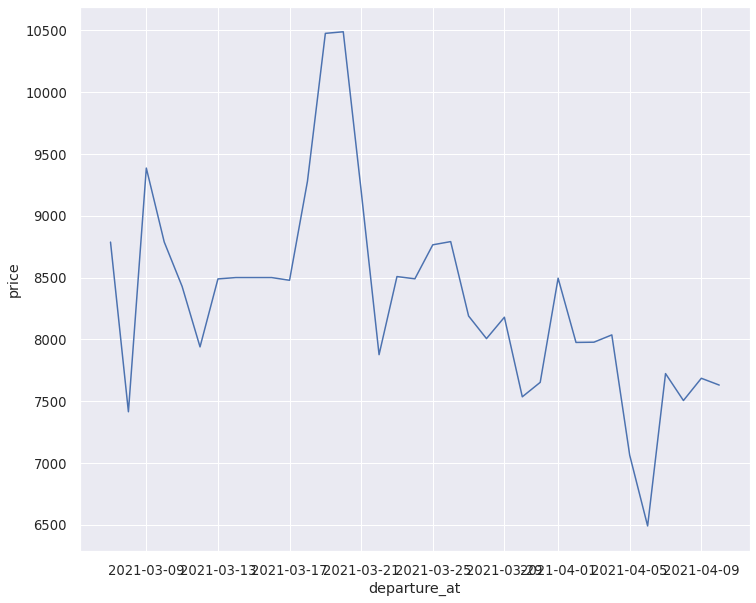

In [7]:
sns.set(context='notebook', font_scale=1.2, rc={'figure.figsize':(12,10)})
#  Avg prices on each day
kzn_soc = df[(df["origin"] == "KZN") & (df["destination"] == "AER") & (df["departure_at"] <= datetime.datetime.now()) & (df["departure_at"] >= "2021-03-07")]
#  2021-03-06 is out

# kzn_soc['day'] = kzn_soc['departure_at'].date
kzn_soc_day = kzn_soc.resample('D', on='departure_at')['price'].min()
# kzn_soc_day = pd.DataFrame(kzn_soc_day)
# kzn_soc_day['departure_at'] = kzn_soc_day.index
display(kzn_soc_day)
kl = sns.lineplot(data=kzn_soc_day)
kl.set(xlim=(datetime.date(datetime(2021,3,7)), datetime.now()), title="Min prices for KZN-AER in March")

departure_at
0     9536.363636
1     8724.668966
2     8777.490323
3     9324.959677
4    10252.299213
5     9496.675159
6     9601.016949
Name: price, dtype: float64

[Text(0.5, 1.0, 'Average prices for KZN-AER by w-day')]

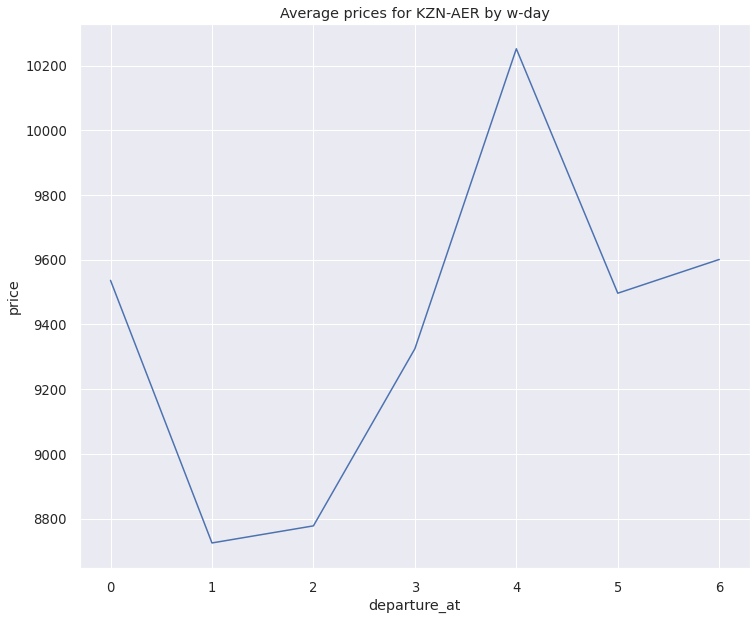

In [8]:
# Avg prices by weekday
kzn_soc_wd = kzn_soc.groupby(kzn_soc['departure_at'].dt.weekday)['price'].mean()
display(kzn_soc_wd)
kwl = sns.lineplot(data=kzn_soc_wd)
kwl.set(title="Average prices for KZN-AER by w-day")

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='price'>)

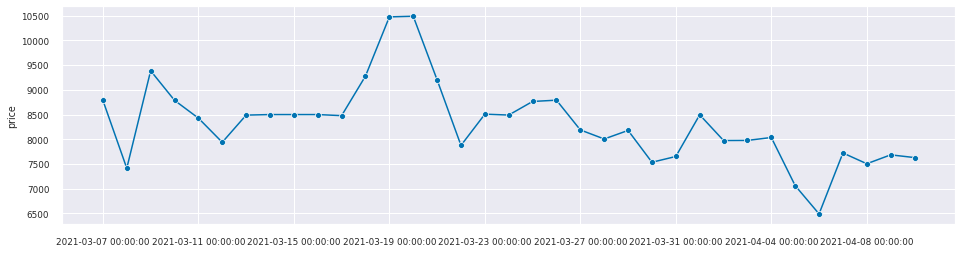

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA, AutoARIMA

sns.set(font_scale=.8)
y = kzn_soc_day
plot_series(y)

26 9


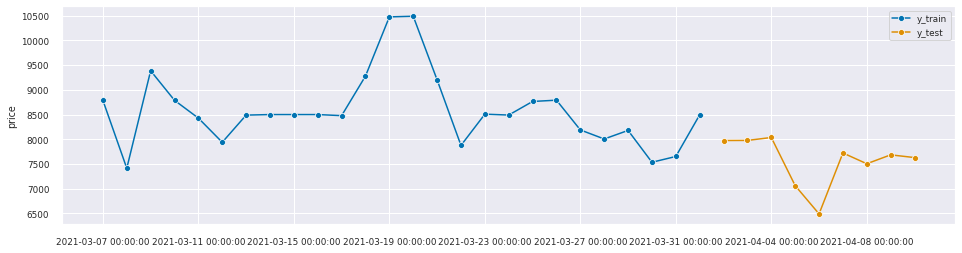

In [10]:
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

0.08436938428258527

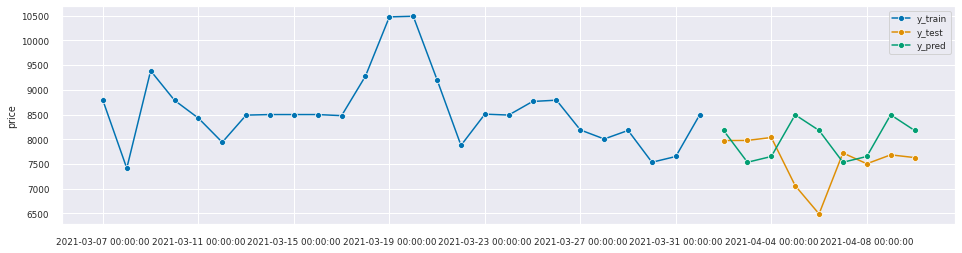

In [11]:
# Naive Forecaster
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=4)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_pred, y_test)

/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


0.09550399635352129

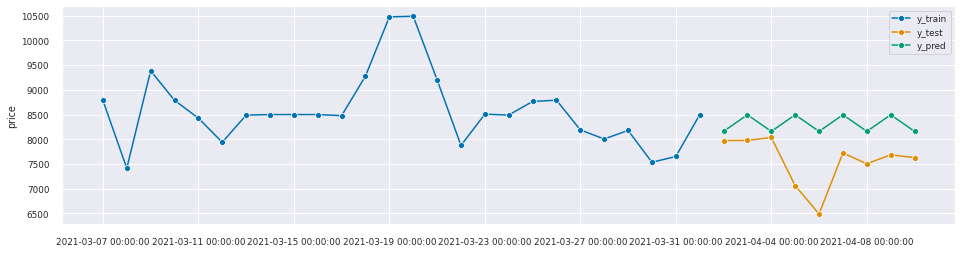

In [12]:
forecaster = AutoARIMA(sp=2) # 2 is best for this case
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
smape_loss(y_test, y_pred)

Тренд установился правильно, но присутствует сдвиг вверх

Let's try different destinations, different models, different statistics

По времени до вылета

In [13]:
kzn_soc

,origin,destination,departure_at,airline,flight_number,price,expires_at,requested_at
2187,KZN,AER,2021-03-07 14:00:00,S7,1054,8787.0,2021-03-07 14:00:00,2021-03-06 10:28:54
2188,KZN,AER,2021-03-08 09:25:00,DP,338,10298.0,2021-03-08 09:25:00,2021-03-06 10:28:54
2189,KZN,AER,2021-03-09 18:10:00,N4,137,10201.0,2021-03-08 06:06:18,2021-03-06 10:28:54
2190,KZN,AER,2021-03-10 17:20:00,DP,284,9358.0,2021-03-08 09:24:21,2021-03-06 10:28:54
2191,KZN,AER,2021-03-11 11:45:00,7R,215,8656.0,2021-03-07 10:42:06,2021-03-06 10:28:54
...,...,...,...,...,...,...,...,...
257968,KZN,AER,2021-04-08 13:55:00,S7,1054,8516.0,2021-04-08 13:55:00,2021-04-08 06:30:05
259644,KZN,AER,2021-04-09 08:00:00,DP,338,8198.0,2021-04-09 08:00:00,2021-04-08 12:30:04
259645,KZN,AER,2021-04-10 08:00:00,DP,338,8198.0,2021-04-10 08:00:00,2021-04-08 12:30:04
264526,KZN,AER,2021-04-09 12:50:00,ZF,345,8230.0,2021-04-09 12:50:00,2021-04-09 06:30:04


In [14]:
def predict_prices(orgn, dest):
    #  Avg prices on each day, 2021-03-06 is out
    orgn_dest = df[(df["origin"] == orgn) & (df["destination"] == dest) & (df["departure_at"] <= datetime.datetime.now()) & (df["departure_at"] >= "2021-03-07")]
    # orgn_dest = orgn_dest.dropna()
    orgn_dest_day = orgn_dest.resample('D', on='departure_at')['price'].mean() 
    
    if orgn_dest_day.empty:
        return ("nan", orgn, dest)
    y = orgn_dest_day
    y_train, y_test = temporal_train_test_split(y)
    
    forecaster = AutoARIMA(sp=2, suppress_warnings=True)
    # forecaster = NaiveForecaster(strategy="last")
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
    return (smape_loss(y_test, y_pred), orgn, dest)

[(0.040350256361358895, 'MOW', 'SVX'),
 (0.04460388951003149, 'MOW', 'KZN'),
 (0.05417189658714532, 'MOW', 'CEK'),
 (0.08456805510579274, 'MOW', 'LED'),
 (0.10174801014961914, 'MOW', 'AER')]

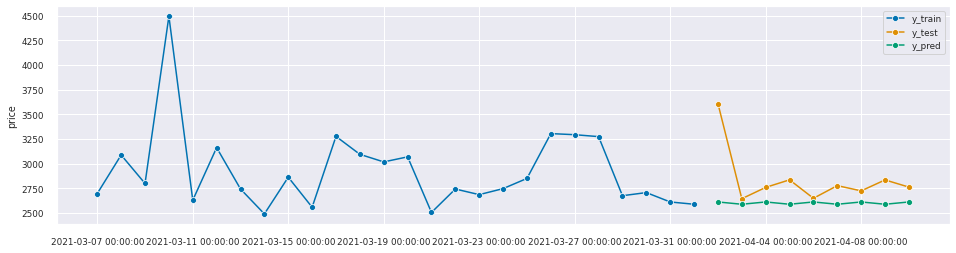

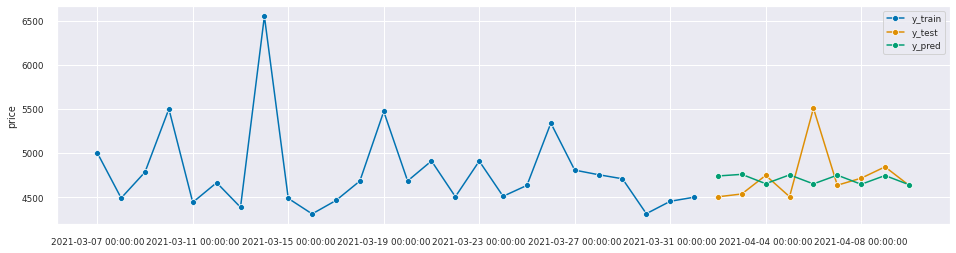

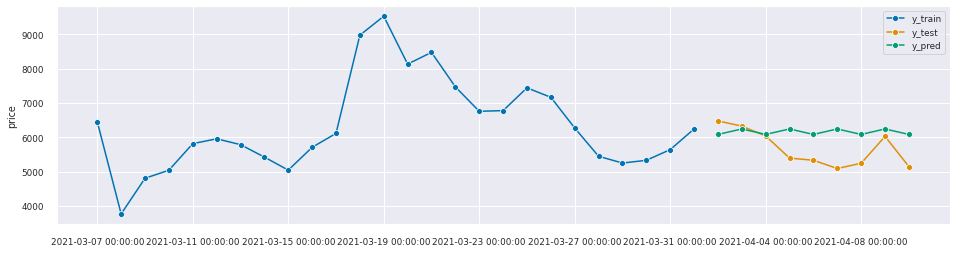

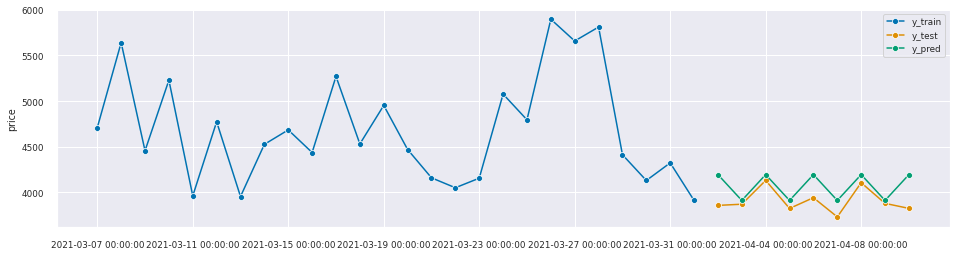

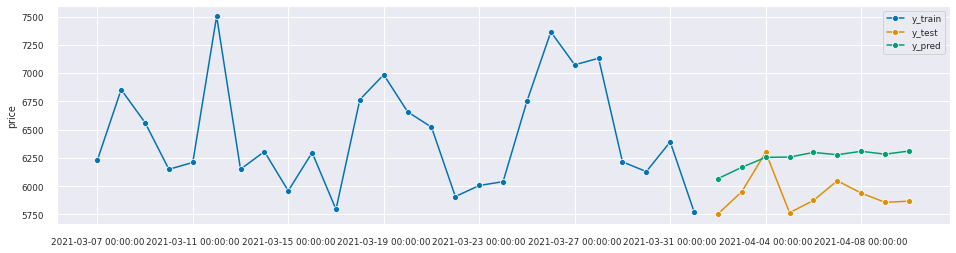

In [15]:
smapes = []
i = "MOW"
#for i in set(df["origin"]):
df_m = df[df["origin"] == "MOW"]
for j in ["LED", "KZN", "AER", "SVX", "CEK"]:
    smapes.append(predict_prices(i, j))
# smapes.append(predict_prices("MOW", "LED"))
clean_smapes = [i for i in smapes if str(i[0]) != "nan"]
clean_smapes.sort()
clean_smapes

Сделать на основе функции выше новую, предсказывающую цены по направлению в зависимости от дней до вылета.

In [87]:
def predict_queried_prices_for(orgn, dest, current_date, flight_date, n_days):
    
    orgn_dest = df[(df["origin"] == orgn) & (df["destination"] == dest) & (df["departure_at"] <= flight_date) 
                   & (df["requested_at"] >= df["departure_at"] - datetime.timedelta(days=n_days + 1))
                   & (df["requested_at"] <= df["departure_at"] - datetime.timedelta(days=n_days))] 
    # display(orgn_dest)
    
    orgn_dest_day_min = orgn_dest.resample('D', on='requested_at')['price'].min()
  
    orgn_dest_day_min = orgn_dest_day_min.fillna(orgn_dest_day_min.mean())  # not very smart
    
    # display(orgn_dest_day_min)
    
    y = orgn_dest_day_min
    y_train, y_test = temporal_train_test_split(y) # make test smaller?
    
    forecaster = AutoARIMA()
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    
    return y_pred[-1]

In [88]:
def predict_queried_prices(orgn, dest, current_date, flight_date):
    results = []
    for i in range(7):
        results.append((i, predict_queried_prices_for(orgn, dest, current_date, flight_date, i)))
    return results

In [89]:
predict_queried_prices("KZN", "MOW", datetime.datetime.now(), datetime.datetime.now())

/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/vladimir/miniconda3/envs/ml/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary

[(0, 5488.332506203472),
 (1, 4622.179164989397),
 (2, 4453.532903225807),
 (3, 4521.107142857145),
 (4, 4491.768087286356),
 (5, 4468.841313205241),
 (6, 4464.027862874823)]